####                                                Task 4 


#### DATA ANALYSIS AND DATA SCIENCE WITH PYTHON 
#### Task 4: Regression Analysis 
#### Objective: Build a regression model to predict house prices based on various features using linear regression. 

1. Dataset Selection 
● Dataset Name: house_prices.csv 
● Key Columns: 
○ Size: Numeric (e.g., in square feet). 
○ Location: Categorical (e.g., urban, suburban, rural). 
○ Number of Rooms: Numeric. 
○ Price: Numeric (target variable)
2. Tasks to Perform 
1. Load and Explore 
● Inspect the Dataset: 
○ Check for missing values and handle them appropriately. 
○ Analyze distributions of numerical variables (e.g., Size, Price). 
○ Identify potential outliers that might skew results. 
2. Data Preprocessing 
● Normalize Numerical Data: 
○ Scale features like Size and Number of Rooms to bring them to a comparable 
range using methods like Min-Max Scaling or Standardization. 
● Encode Categorical Features: 
○ Convert Location into numerical values using mets
■ One-Hot Encoding for non-ordinal categories. 
■ Label Encoding for ordinal categories (if any)

3. Feature Selection
   ● Analyze Predictors: 
○ Use correlation analysis to identify relationships between features and the target 
variable (Price). 
○ Consider removing low-impact predictors to improve model performance. 
4. Model Training 
● Train-Test Split: 
○ Divide the dataset into training and testing sets (e.g., 80% train, 20% test). 
Ensure the split is random but reproducible. 
● Train a Linear Regression Model: 
○ Use libraries like scikit-learn or similar tools to fit the regression model. 
5. Model Evaluation 
● Evaluation Metrics: 
○ Calculate Root Mean Square Error (RMSE) to measure prediction accuracy. 
○ Determine R² (Coefficient of Determination) to evaluate how well the model 
explains variability egression Model:
.hods such a

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [54]:
url="https://raw.githubusercontent.com/renjinirv/houseprice/main/House%20Price%20Prediction%20Dataset.csv"
try:
    data = pd.read_csv(url, on_bad_lines='skip')
    print(data)
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")

        Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0        1  1360         5          4       3       1970  Downtown  Excellent   
1        2  4272         5          4       3       1958  Downtown  Excellent   
2        3  3592         2          2       3       1938  Downtown       Good   
3        4   966         4          2       2       1902  Suburban       Fair   
4        5  4926         1          4       2       1975  Downtown       Fair   
...    ...   ...       ...        ...     ...        ...       ...        ...   
1995  1996  4994         5          4       3       1923  Suburban       Poor   
1996  1997  3046         5          2       1       2019  Suburban       Poor   
1997  1998  1062         5          1       2       1903     Rural       Poor   
1998  1999  4062         3          1       2       1936     Urban  Excellent   
1999  2000  2989         5          1       3       1903  Suburban       Fair   

     Garage   Price  
0    

Dataset Name: house_prices.csv 
● Key Columns: 
○ Size: Numeric (e.g., in square feet). 
○ Location: Categorical (e.g., urban, suburban, rural). 
○ Number of Rooms: Numeric. 
○ Price: Numeric (target variable). 

In [55]:
data=pd.DataFrame(data)
data

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [56]:
data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [57]:
data.tail()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,Fair,No,482525


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [59]:
data.size

20000

In [60]:
data.shape

(2000, 10)

In [61]:
data.dtypes

Id            int64
Area          int64
Bedrooms      int64
Bathrooms     int64
Floors        int64
YearBuilt     int64
Location     object
Condition    object
Garage       object
Price         int64
dtype: object

In [62]:
data.describe(include="all")

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000,2000,2000,2000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,4,4,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Downtown,Fair,No,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,558,521,1038,NaN
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,NaN,NaN,NaN,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,NaN,NaN,NaN,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,NaN,NaN,NaN,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,NaN,NaN,NaN,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,NaN,NaN,NaN,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,NaN,NaN,NaN,780086.000000


In [63]:
data.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [64]:
data = data.drop(columns=['Id'], errors='ignore')

In [65]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("\nNumerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price']
Categorical Columns: ['Location', 'Condition', 'Garage']


In [66]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [67]:
print("\nNull values in each column:")
data.isnull().sum()


Null values in each column:


Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

#### Data visualization

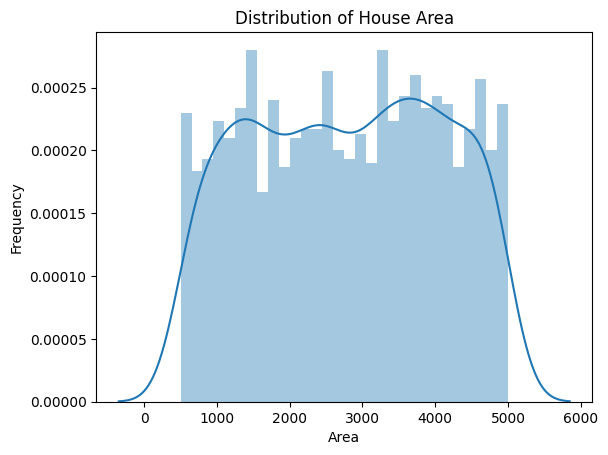

In [68]:
sns.distplot(data['Area'], kde=True, bins=30)
plt.title('Distribution of House Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

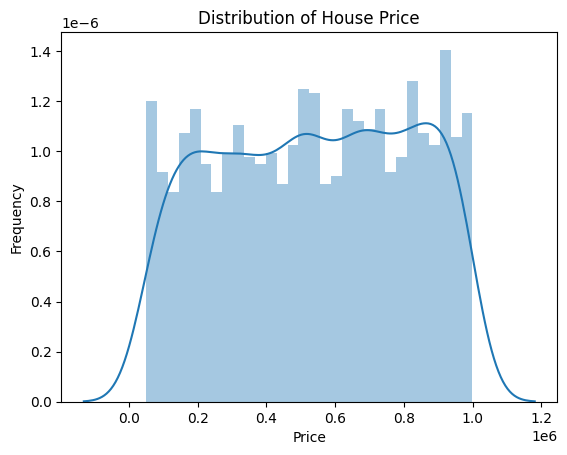

In [69]:
sns.distplot(data['Price'], kde=True, bins=30)
plt.title('Distribution of House Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [70]:
# Skewness and kurtosis for numerical columns##### explain skewness and kurtosis
print("\nSkewness of numerical columns:")
print(data[numerical_cols].skew())
print("\nKurtosis of numerical columns:")
print(data[numerical_cols].kurt())


Skewness of numerical columns:
Area        -0.038552
Bedrooms    -0.021753
Bathrooms   -0.066546
Floors       0.011837
YearBuilt   -0.001577
Price       -0.064351
dtype: float64

Kurtosis of numerical columns:
Area        -1.194772
Bedrooms    -1.309963
Bathrooms   -1.335130
Floors      -1.472606
YearBuilt   -1.234215
Price       -1.202525
dtype: float64


#### Identify potential outliers that might skew results. 


In [71]:
Q1 = data['Area'].quantile(0.25)
Q3 = data['Area'].quantile(0.75)
IQR = Q3 - Q1
    
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['Area'] < lower_bound) | (data['Area'] > upper_bound)]
    
print("Number of outliers in 'Area':\n", outliers['Area'].count())

Number of outliers in 'Area':
 0


In [72]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
    
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['Price'] < lower_bound) | (data['Price'] > upper_bound)]
    
print("Number of outliers in 'Price':\n", outliers['Price'].count())

Number of outliers in 'Price':
 0


In [73]:
Q1 = data['Floors'].quantile(0.25)
Q3 = data['Floors'].quantile(0.75)
IQR = Q3 - Q1
    
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['Floors'] < lower_bound) | (data['Floors'] > upper_bound)]
    
print("Number of outliers in 'Floors':\n", outliers['Floors'].count())

Number of outliers in 'Floors':
 0


##### Scale features like Size and Number of Rooms to bring them to a comparable range using methods like Min-Max Scaling or Standardization. 


In [74]:
from sklearn.preprocessing import StandardScaler
features = [ 'Area', 'Bedrooms']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])
scaled_data

array([[-1.10147065,  1.40179052],
       [ 1.14748543,  1.40179052],
       [ 0.62231712, -0.70458141],
       ...,
       [-1.33161794,  1.40179052],
       [ 0.9853011 , -0.00245743],
       [ 0.15661639,  1.40179052]])

#### Convert Location into numerical values using methods such as:
### One-Hot Encoding for non-ordinal categories. ###  Label Encoding for ordinal categories (if any).

#### label encoding of ordinal column condition

In [75]:
from sklearn.preprocessing import LabelEncoder
###(assigns a unique integer to each category in the data, making it suitable for machine learning models that work with numerical inputs.)
label_encoder = LabelEncoder()
data['Condition']=label_encoder.fit_transform(data['Condition'])
data

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,0,No,149919
1,4272,5,4,3,1958,Downtown,0,No,424998
2,3592,2,2,3,1938,Downtown,2,No,266746
3,966,4,2,2,1902,Suburban,1,Yes,244020
4,4926,1,4,2,1975,Downtown,1,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,3,No,295620
1996,3046,5,2,1,2019,Suburban,3,Yes,580929
1997,1062,5,1,2,1903,Rural,3,No,476925
1998,4062,3,1,2,1936,Urban,0,Yes,161119


In [76]:
from sklearn.preprocessing import LabelEncoder
###(assigns a unique integer to each category in the data, making it suitable for machine learning models that work with numerical inputs.)
label_encoder = LabelEncoder()
data['Location']=label_encoder.fit_transform(data['Location'])
data

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,0,0,No,149919
1,4272,5,4,3,1958,0,0,No,424998
2,3592,2,2,3,1938,0,2,No,266746
3,966,4,2,2,1902,2,1,Yes,244020
4,4926,1,4,2,1975,0,1,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,2,3,No,295620
1996,3046,5,2,1,2019,2,3,Yes,580929
1997,1062,5,1,2,1903,1,3,No,476925
1998,4062,3,1,2,1936,3,0,Yes,161119


In [77]:
from sklearn.preprocessing import LabelEncoder
###(assigns a unique integer to each category in the data, making it suitable for machine learning models that work with numerical inputs.)
label_encoder = LabelEncoder()
data['Garage']=label_encoder.fit_transform(data['Garage'])
data

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,0,0,0,149919
1,4272,5,4,3,1958,0,0,0,424998
2,3592,2,2,3,1938,0,2,0,266746
3,966,4,2,2,1902,2,1,1,244020
4,4926,1,4,2,1975,0,1,1,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,2,3,0,295620
1996,3046,5,2,1,2019,2,3,1,580929
1997,1062,5,1,2,1903,1,3,0,476925
1998,4062,3,1,2,1936,3,0,1,161119


#### Analyze Predictors:
#### ○ Use correlation analysis to identify relationships between features and the target
#### variable (Price).
##### ○ Consider removing low-impact predictors to improve model performance.

In [78]:


# Compute correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)



               Area  Bedrooms  Bathrooms    Floors  YearBuilt  Location  \
Area       1.000000  0.047523   0.021881  0.017749  -0.011609 -0.003910   
Bedrooms   0.047523  1.000000  -0.011990  0.010435  -0.014125  0.016958   
Bathrooms  0.021881 -0.011990   1.000000  0.029089  -0.000839 -0.016471   
Floors     0.017749  0.010435   0.029089  1.000000  -0.006474  0.006430   
YearBuilt -0.011609 -0.014125  -0.000839 -0.006474   1.000000 -0.040727   
Location  -0.003910  0.016958  -0.016471  0.006430  -0.040727  1.000000   
Condition  0.002030  0.006743   0.020183  0.021006   0.025780  0.028387   
Garage    -0.003441 -0.041713   0.004057 -0.004635  -0.011703  0.019827   
Price      0.001542 -0.003471  -0.015737  0.055890   0.004845 -0.012289   

           Condition    Garage     Price  
Area        0.002030 -0.003441  0.001542  
Bedrooms    0.006743 -0.041713 -0.003471  
Bathrooms   0.020183  0.004057 -0.015737  
Floors      0.021006 -0.004635  0.055890  
YearBuilt   0.025780 -0.011703  0.

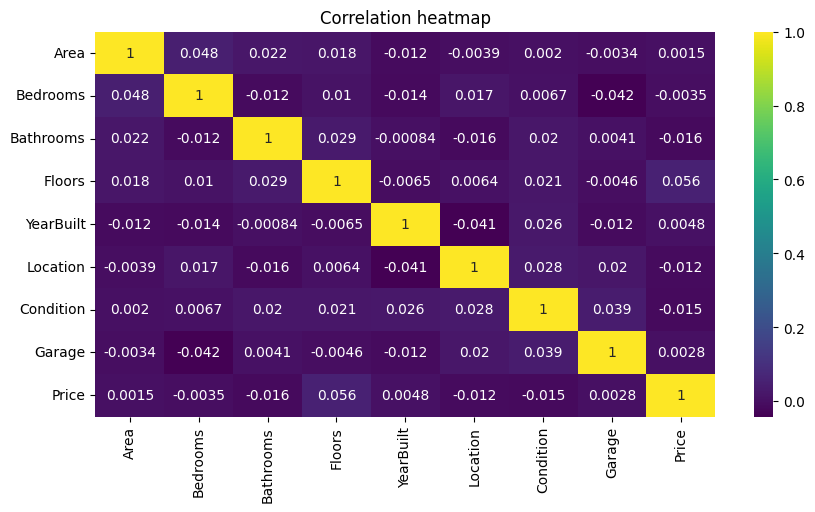

In [79]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.title("Correlation heatmap")
plt.show()

### from the above heatmap , the price has negative correlation with bedrooms, bathrooms, location, condition. Hence we can remove these features to improve model performance.

In [80]:
datanew = data.drop(['Bedrooms', 'Bathrooms','Location', 'Condition'], axis=1)
print(datanew)
df1=pd.DataFrame(datanew)
df1

      Area  Floors  YearBuilt  Garage   Price
0     1360       3       1970       0  149919
1     4272       3       1958       0  424998
2     3592       3       1938       0  266746
3      966       2       1902       1  244020
4     4926       2       1975       1  636056
...    ...     ...        ...     ...     ...
1995  4994       3       1923       0  295620
1996  3046       1       2019       1  580929
1997  1062       2       1903       0  476925
1998  4062       2       1936       1  161119
1999  2989       3       1903       0  482525

[2000 rows x 5 columns]


,Area,Floors,YearBuilt,Garage,Price
0,1360,3,1970,0,149919
1,4272,3,1958,0,424998
2,3592,3,1938,0,266746
3,966,2,1902,1,244020
4,4926,2,1975,1,636056
...,...,...,...,...,...
1995,4994,3,1923,0,295620
1996,3046,1,2019,1,580929
1997,1062,2,1903,0,476925
1998,4062,2,1936,1,161119


# 4. Model Training 
#### ● Train-Test Split: 
#### ○ Divide the dataset into training and testing sets (e.g., 80% train, 20% test). 
#### Ensure the split is random but reproducible. 
#### ● Train a Linear Regression Model: 
#### ○ Use libraries like scikit-learn or similar tools to fit the regression model.

In [81]:
from sklearn.model_selection import train_test_split
# Define the target and features
X=df1.drop(['Price'],axis=1)
y = df1['Price']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
print(X.head())

   Area  Floors  YearBuilt  Garage
0  1360       3       1970       0
1  4272       3       1958       0
2  3592       3       1938       0
3   966       2       1902       1
4  4926       2       1975       1


In [83]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
print(y)

0       149919
1       424998
2       266746
3       244020
4       636056
         ...  
1995    295620
1996    580929
1997    476925
1998    161119
1999    482525
Name: Price, Length: 2000, dtype: int64


#### Linear regression model

In [85]:
X_train

,Area,Floors,YearBuilt,Garage
968,4483,3,1933,0
240,1062,1,1970,0
819,1422,1,1993,1
692,2658,1,1972,1
420,3286,1,1981,1
...,...,...,...,...
1130,3483,3,1931,1
1294,1747,2,1941,1
860,1484,3,1973,0
1459,3456,1,1955,1


In [86]:
X_test

,Area,Floors,YearBuilt,Garage
1860,633,2,1901,0
353,3856,2,1901,0
1333,1598,1,2013,0
905,1705,2,1996,1
1289,2564,3,1994,1
...,...,...,...,...
965,1811,3,1970,0
1284,794,2,2013,1
1739,3540,2,1939,1
261,3670,2,1910,1


In [87]:
y_train

968     434325
240     614772
819     922811
692     794314
420     796988
         ...  
1130    387088
1294    942215
860     323139
1459    274997
1126    644206
Name: Price, Length: 1600, dtype: int64

In [88]:
y_test

1860    514764
353     694256
1333     66375
905     650243
1289    223285
         ...  
965     386940
1284    632570
1739    494049
261     562193
535     447530
Name: Price, Length: 400, dtype: int64

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lr=LinearRegression()## creating class for linear regression

In [91]:
lr.fit(X_train,y_train)## trains the model using fit  function and class

LinearRegression()

In [92]:
c=lr.intercept_
c

262060.45371003821

In [93]:
m=lr.coef_
m

array([-4.19390107e-01,  2.33691906e+04,  1.15734572e+02,  3.22829684e+03])

In [94]:
predicted_training_values=lr.predict(X_train)### to get the machine predicted values using xtrain
predicted_training_values

array([554002.82725716, 512981.35885389, 518720.57041537, ...,
       559889.9610687 , 513469.6172011 , 563626.16270411])

In [95]:
predicted_testing_values=lr.predict(X_test)#### to get predicted values using  xtest
predicted_testing_values

array([528544.78230249, 527193.08798771, 517733.15235332, 542318.2772931 ,
       565095.74260913, 536822.46864638, 567410.01465938, 561154.44211389,
       556643.08510308, 565373.66146999, 536531.99145459, 557731.47359587,
       504312.83790046, 534093.21183509, 532848.89221042, 518312.50384128,
       536881.50006642, 554886.32206021, 561115.66737632, 509625.89504558,
       537136.95993409, 537919.23134343, 536822.52621368, 553495.01422764,
       554809.34862789, 540722.22160079, 513263.85053614, 518452.23541171,
       537412.67648423, 507831.11055781, 515341.12215821, 563030.73133725,
       532944.7758922 , 567441.4689174 , 516988.34971835, 507976.37618754,
       561523.95899315, 565134.59201151, 535907.97317043, 510636.77103338,
       507434.31622409, 504466.00077704, 512042.78089198, 543472.96989258,
       537093.55480783, 557267.66233257, 559532.54893524, 512879.21851552,
       563129.39337259, 537945.33889026, 509717.93860152, 533297.99062496,
       554221.748893  , 5

In [96]:
X_train.iloc[0]

Area         4483
Floors          3
YearBuilt    1933
Garage          0
Name: 968, dtype: int64

In [97]:
predicted_training_values[0]

554002.8272571589

In [98]:
y_train.iloc[0]

434325

In [99]:
X_test.iloc[1]

Area         3856
Floors          2
YearBuilt    1901
Garage          0
Name: 353, dtype: int64

In [100]:
predicted_testing_values[1]

527193.0879877051

In [101]:
y_test.iloc[1]

694256

In [102]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_train,predicted_training_values)
mse

75635184620.31754

In [103]:
rmse=np.sqrt(mse)
rmse

275018.51686807844

#### As the RMSE value is extremely high, it means that the model is suitable for prediction of house price.

In [104]:
from sklearn.metrics import r2_score
r2=r2_score(y_train, predicted_training_values)
r2

0.004898673873709125

#### R2 score of 0.00489 indicates that model explains only 0.48 percentage of the variance in the training data.

#### The score is very low as it cannot be treated as the best score to determine  the model performance.

#### Conclusions

#### 1. Area is having 0.0015 correlation with price. It cannot be treated as a highly related varibale to determine the house price.
#### 2. Loaction variable is having negative correlation with price. So it has been removed before model prediction.
#### 3. Here the linear regression model is not the best model to determone the accuracy since it provides veery low R2 score. 


#### Suggestions

#### Better go for alternative models like random forest classifier.